# Import the packages and modules

In [1]:
from gym_vrp.envs import SantaIRPEnv_RNN
from agents import SDPAgentRNN

import torch
import pandas as pd
import matplotlib.pyplot as plt


## Train the agent

In [2]:
batch_size = 128
seed = 123
num_nodes = 10

num_epochs = 1001
lr=1E-4
gamma = 0.99
dropout_rate = 0.5
hidden_dim=512
num_layers = 2


# Instantiate the SantaIRPEnv environment
env_santa = SantaIRPEnv_RNN(num_nodes=num_nodes, batch_size=batch_size, seed=seed, num_draw=3,max_history_length=10)

# Instantiate the TSPAgentFF (assuming it's compatible with SantaIRPEnv)
agent = SDPAgentRNN(
    node_dim=num_nodes,
    num_features=7, 
    hidden_dim=hidden_dim,
    lr=lr,
    gamma=gamma,
    dropout_rate=dropout_rate,
    csv_path=f"./train_logs/loss_log_santa_rnn_{num_nodes}_{seed}.csv",
    seed=seed,
    num_layers=num_layers,
)


# Train the agent
agent.train(
    env_santa,
    episodes=num_epochs,
    check_point_dir=f"./check_points/santa_rnn_{num_nodes}_{seed}/",
)

/Users/finlayduff/Documents/BATH MSc/Reinforcement Learning/VRP-GYM-extension/agents/rnn_sdp_agent.py:59: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:264.)
  torch.tensor(seq, dtype=torch.float, device=self.device).view(


Epoch 00213: reducing learning rate of group 0 to 1.0000e-05.
Epoch 00567: reducing learning rate of group 0 to 1.0000e-06.


## Visualise the actions of the agent in the environments

In [3]:
# Setup for evaluation
env_santa.reset()
env_santa.enable_video_capturing(
    video_save_path=f"./videos/video_test_santa_rnn_{num_nodes}_{seed}.mp4"
)

In [4]:
# load the best agent from training
agent.model.load_state_dict(torch.load(f"./check_points/santa_rnn_{num_nodes}_{seed}/model_epoch_{num_epochs-1}.pt"))

<All keys matched successfully>

INFO:root:Start Evaluation


<Figure size 640x480 with 0 Axes>

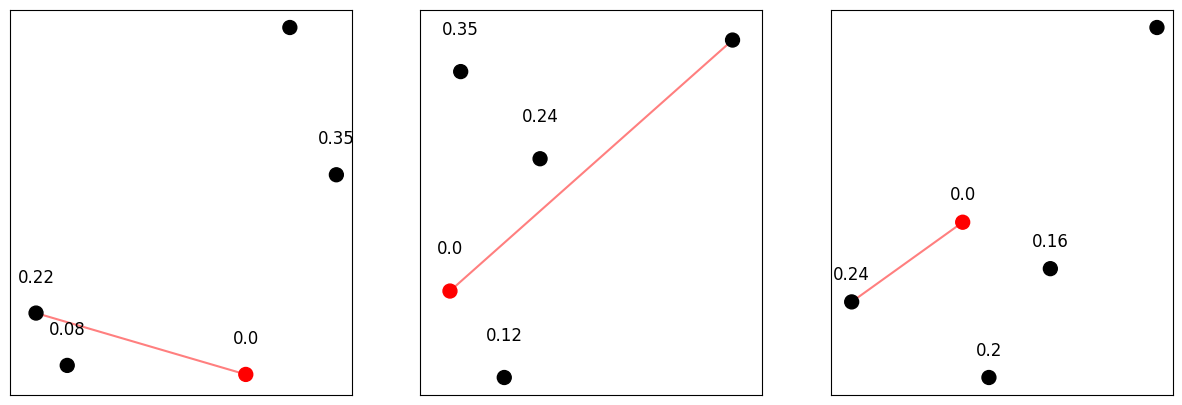

<Figure size 640x480 with 0 Axes>

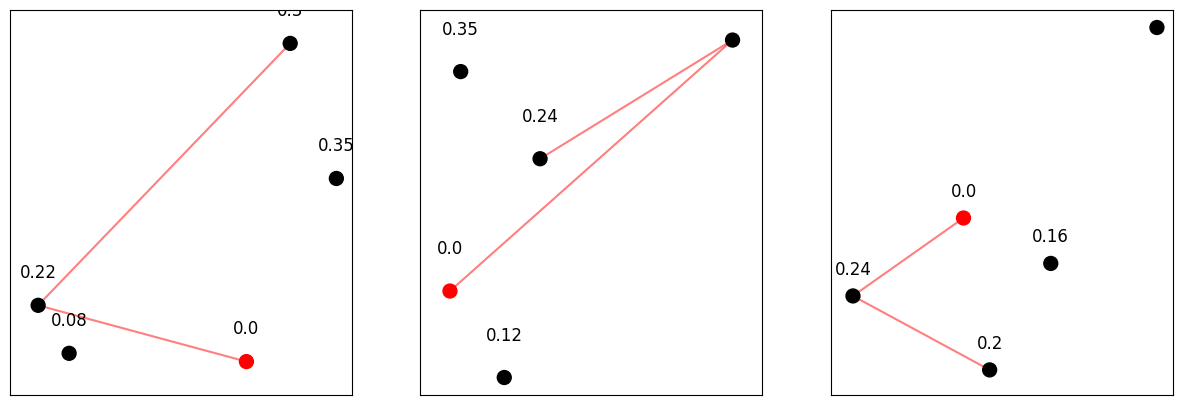

<Figure size 640x480 with 0 Axes>

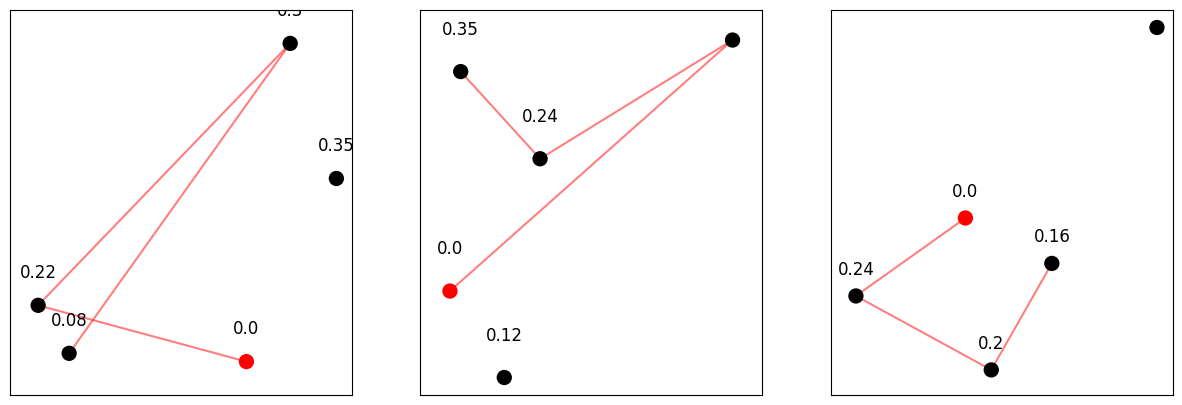

<Figure size 640x480 with 0 Axes>

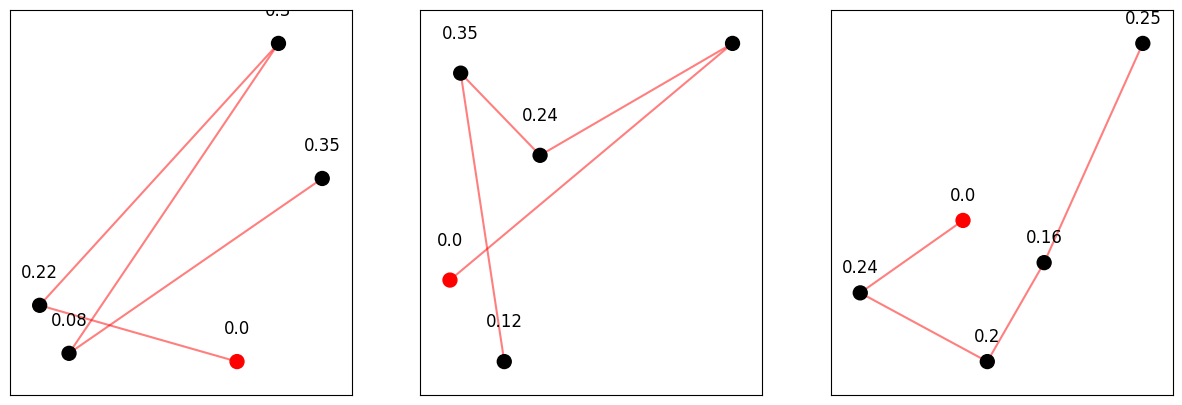

<Figure size 640x480 with 0 Axes>

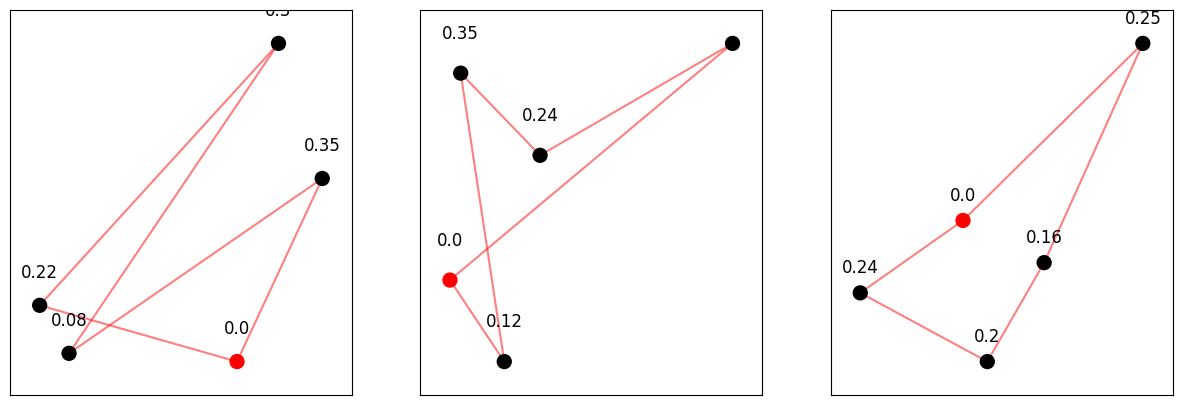

<Figure size 640x480 with 0 Axes>

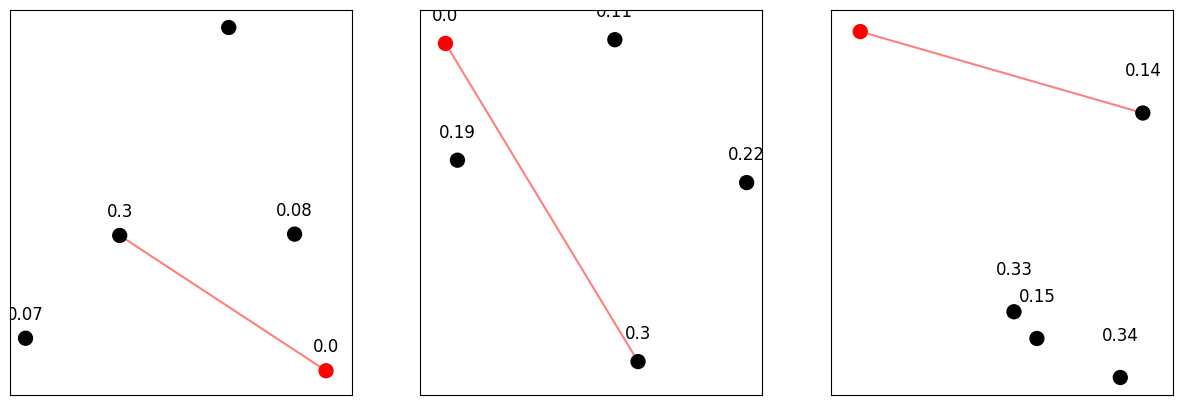

<Figure size 640x480 with 0 Axes>

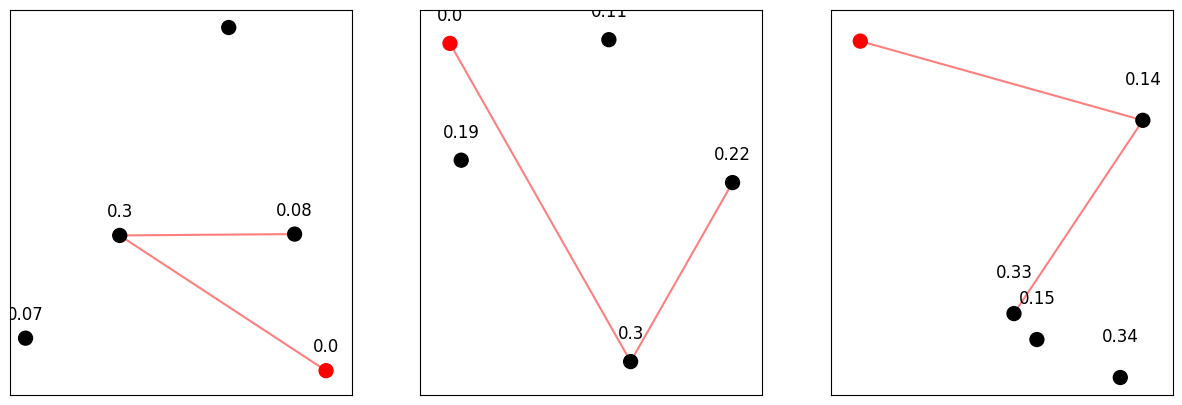

<Figure size 640x480 with 0 Axes>

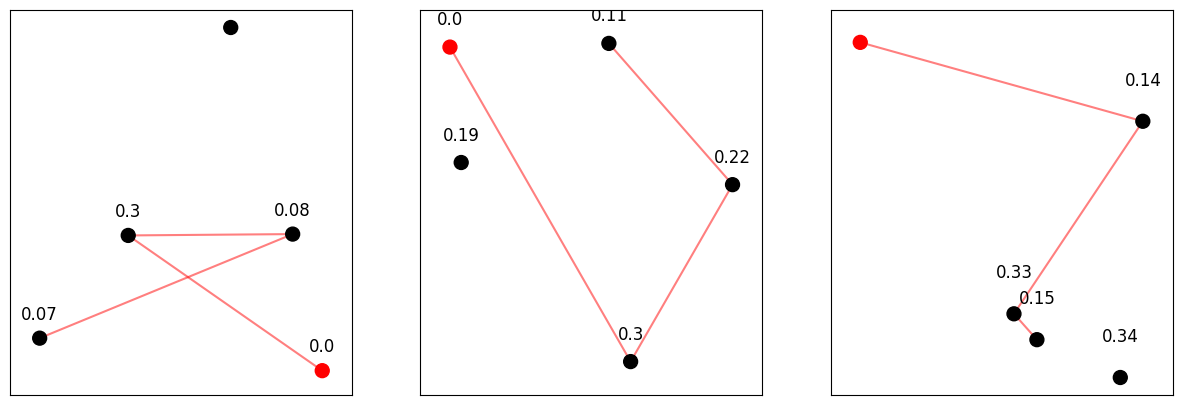

<Figure size 640x480 with 0 Axes>

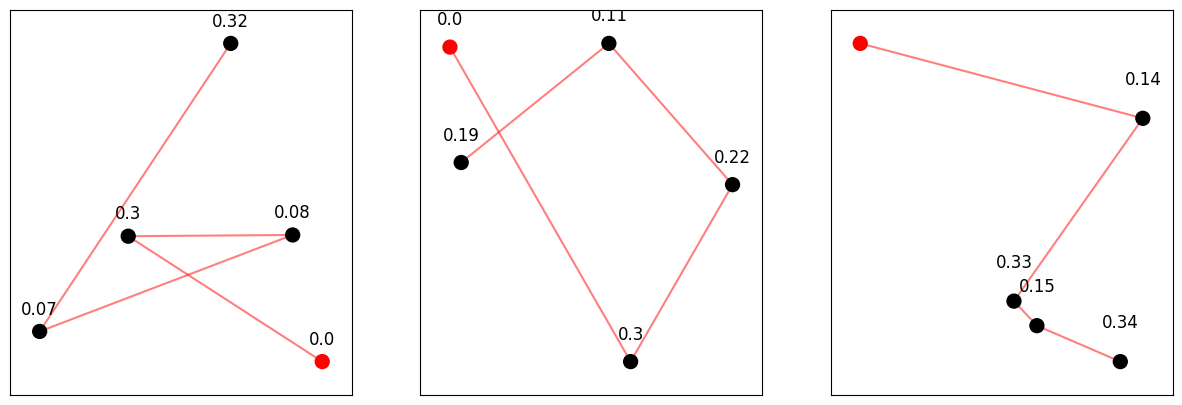

<Figure size 640x480 with 0 Axes>

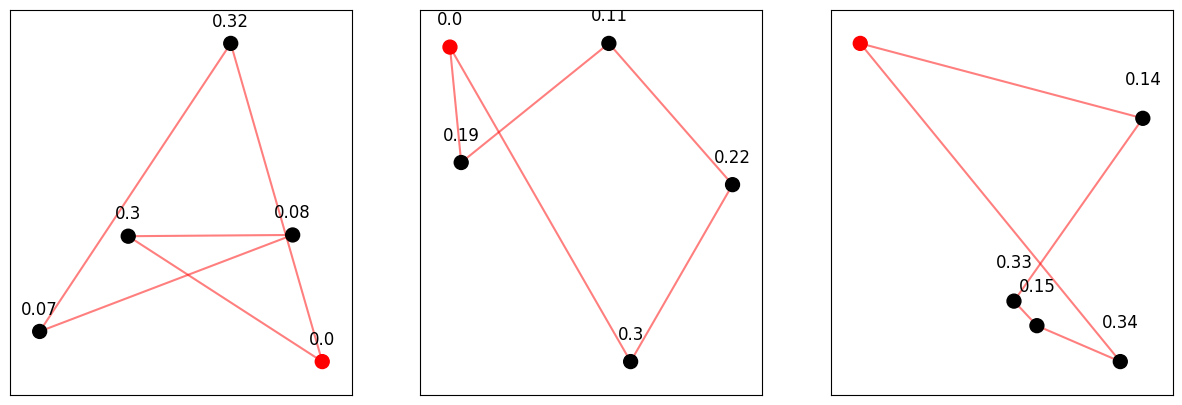

<Figure size 640x480 with 0 Axes>

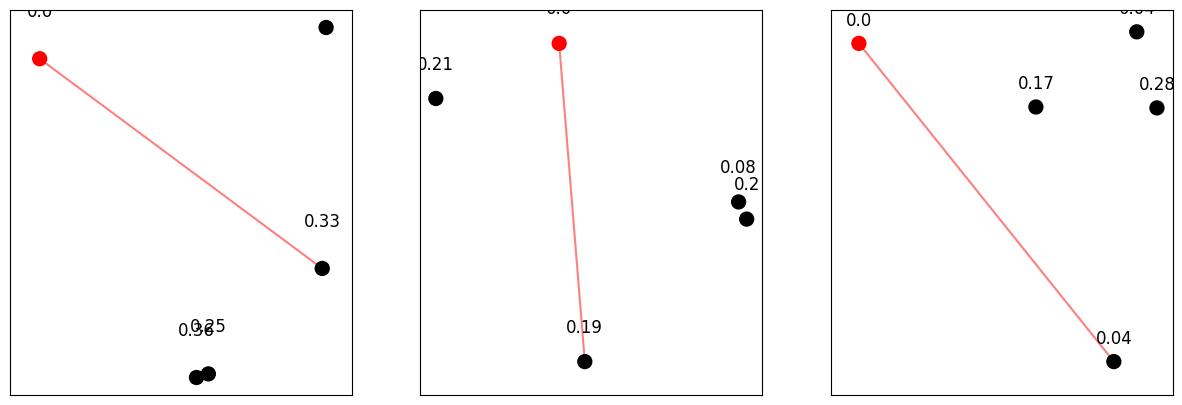

<Figure size 640x480 with 0 Axes>

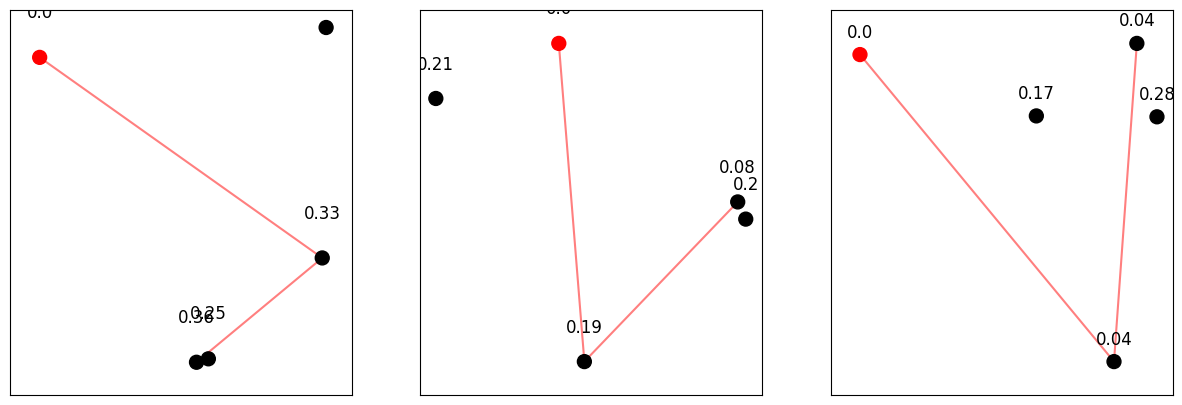

<Figure size 640x480 with 0 Axes>

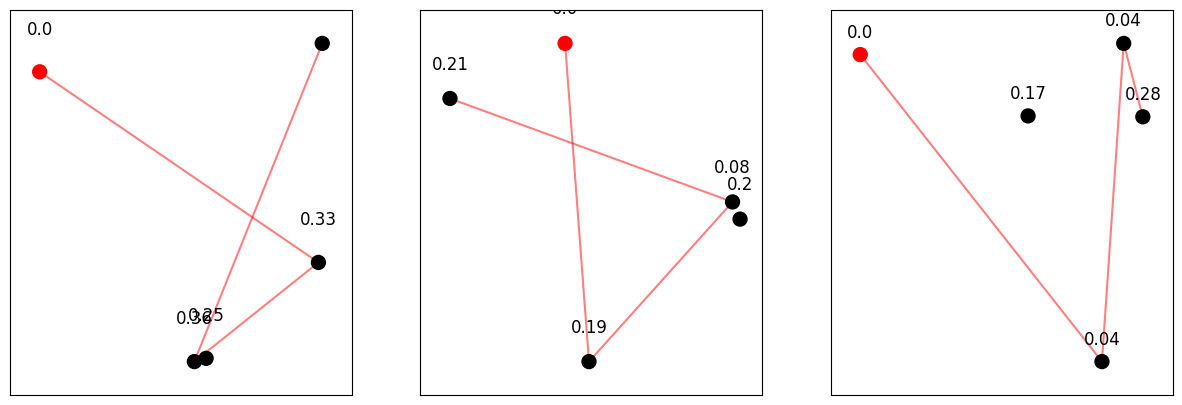

<Figure size 640x480 with 0 Axes>

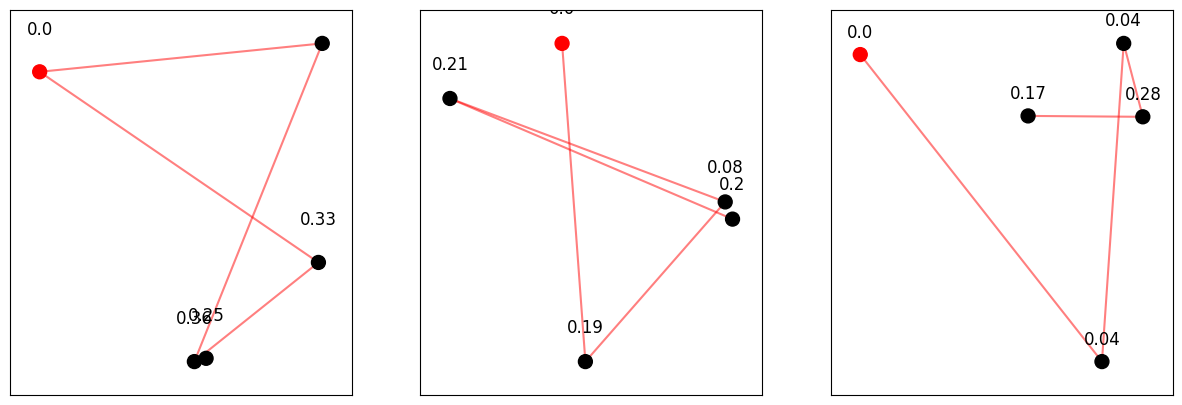

<Figure size 640x480 with 0 Axes>

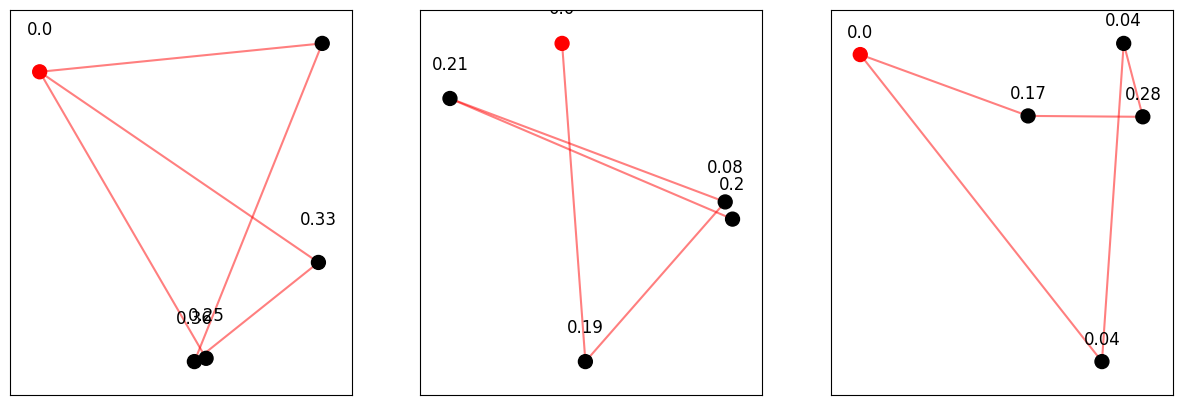

<Figure size 640x480 with 0 Axes>

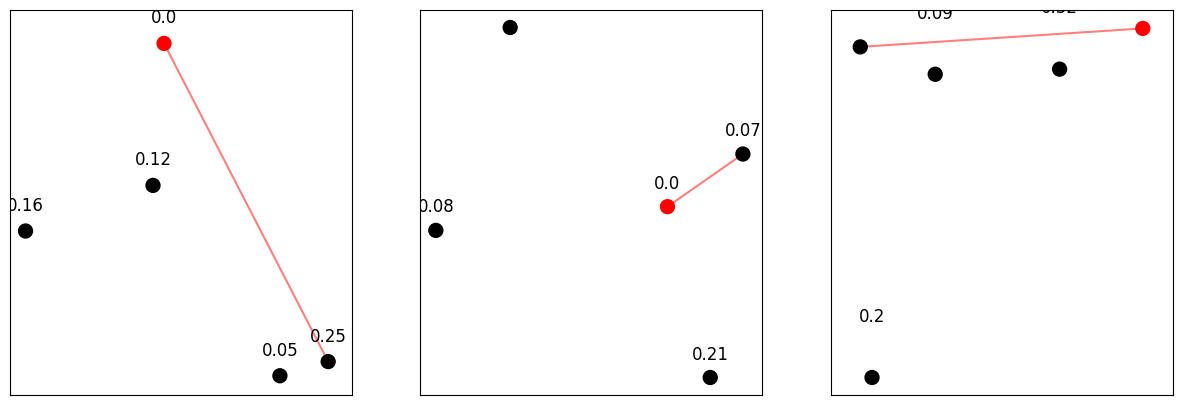

<Figure size 640x480 with 0 Axes>

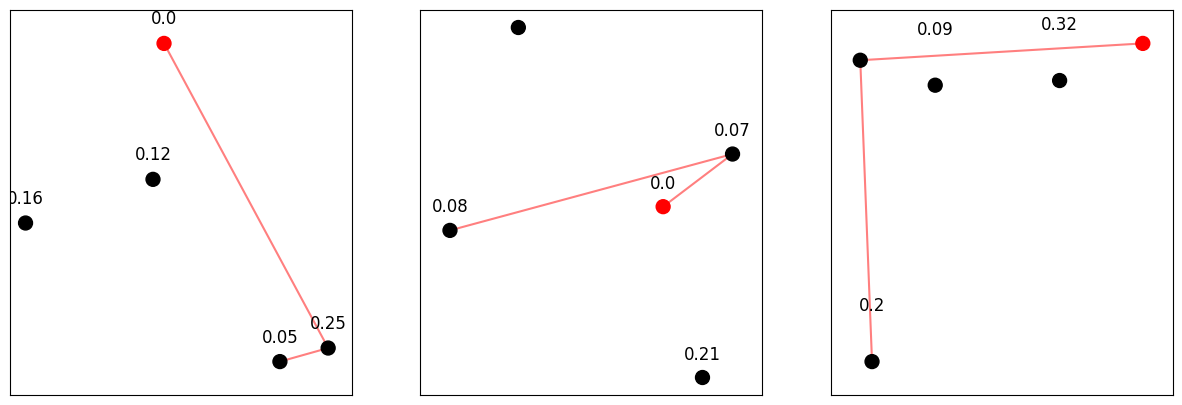

<Figure size 640x480 with 0 Axes>

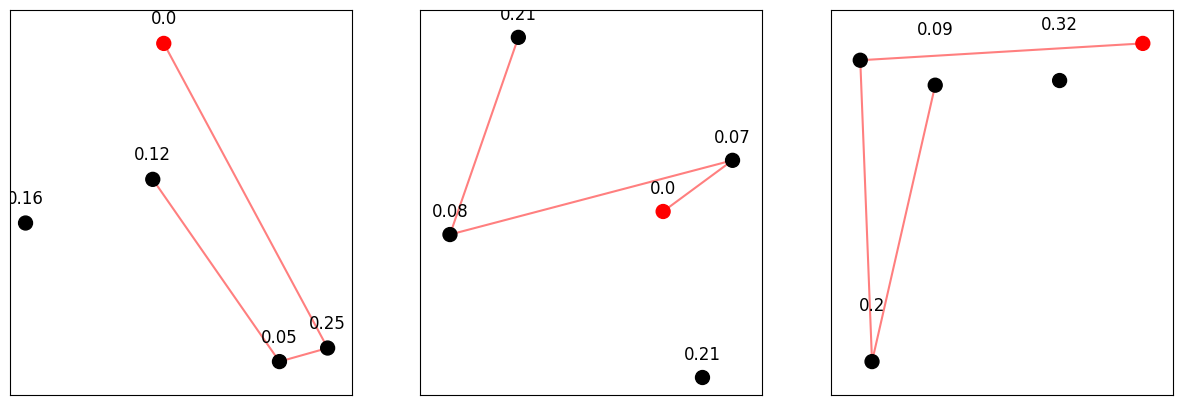

<Figure size 640x480 with 0 Axes>

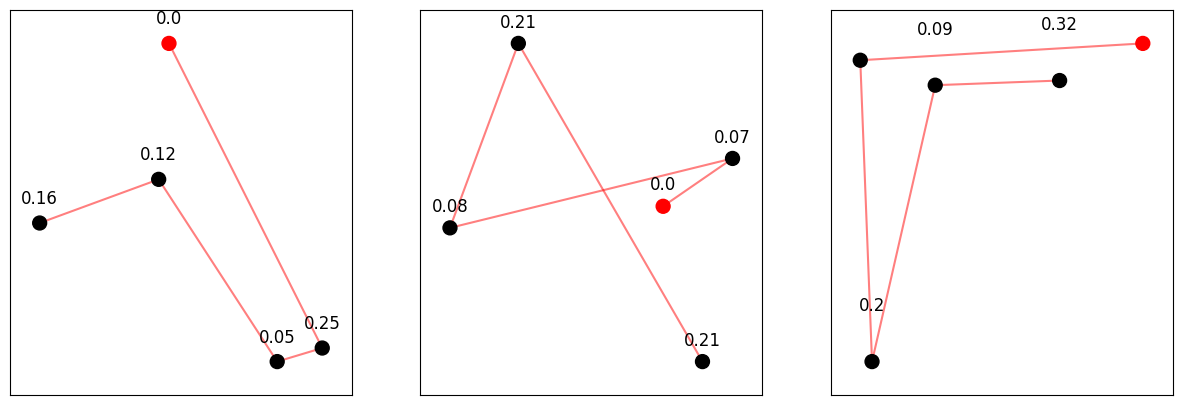

<Figure size 640x480 with 0 Axes>

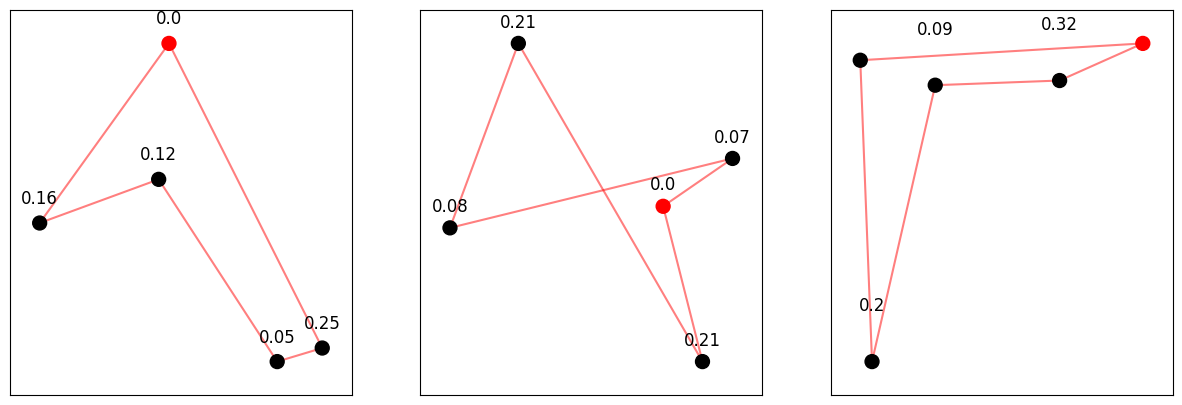

<Figure size 640x480 with 0 Axes>

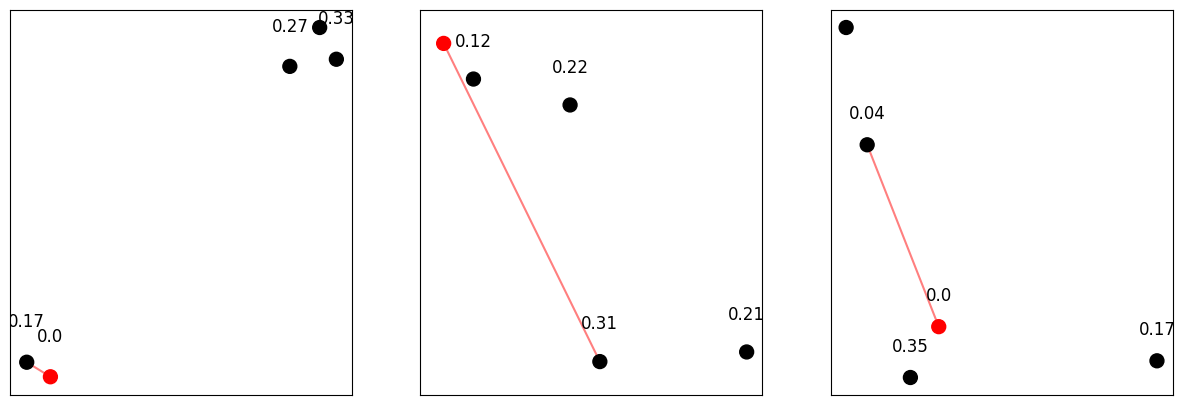

<Figure size 640x480 with 0 Axes>

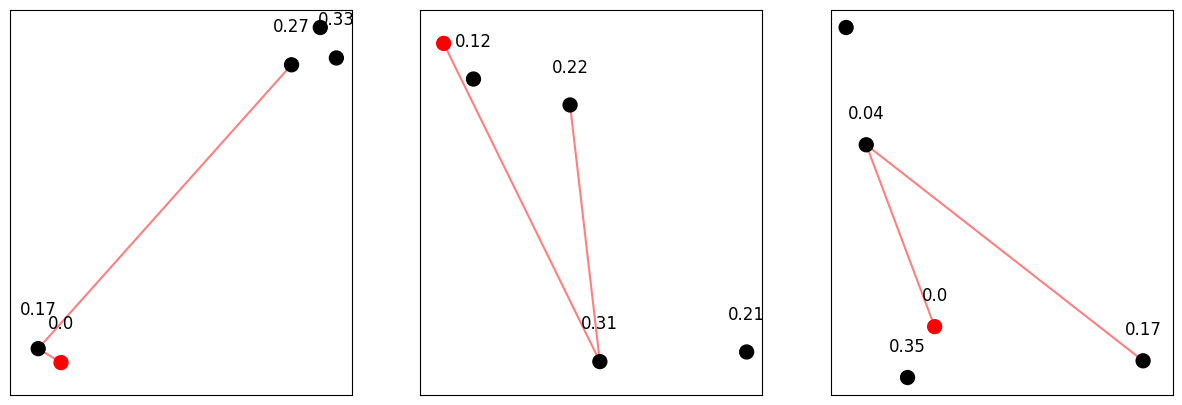

<Figure size 640x480 with 0 Axes>

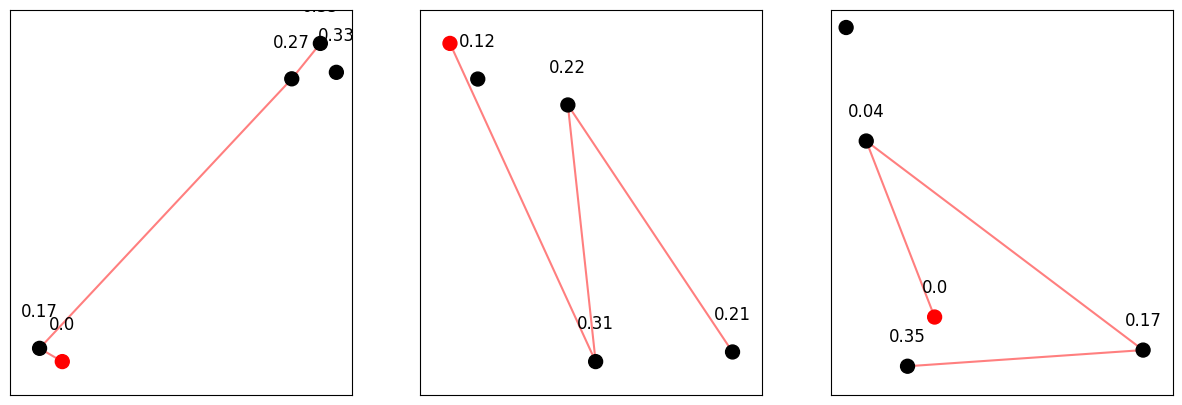

<Figure size 640x480 with 0 Axes>

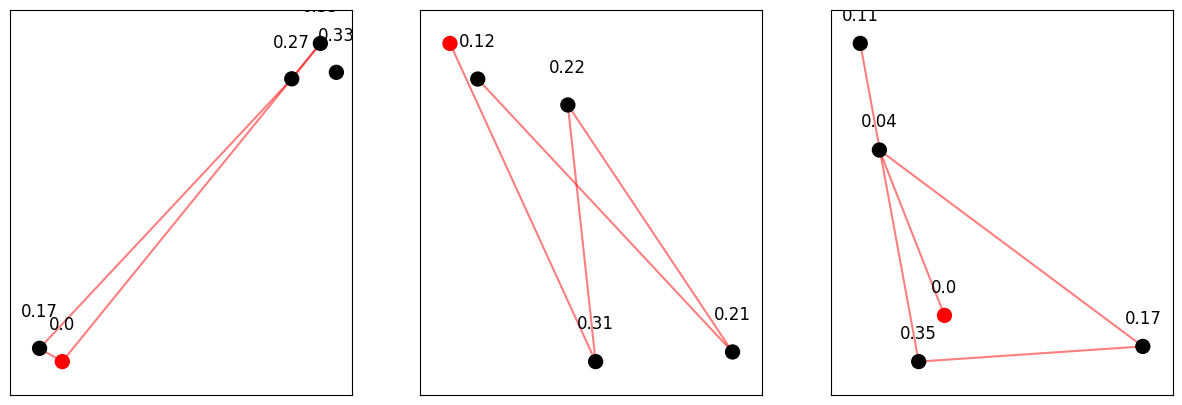

<Figure size 640x480 with 0 Axes>

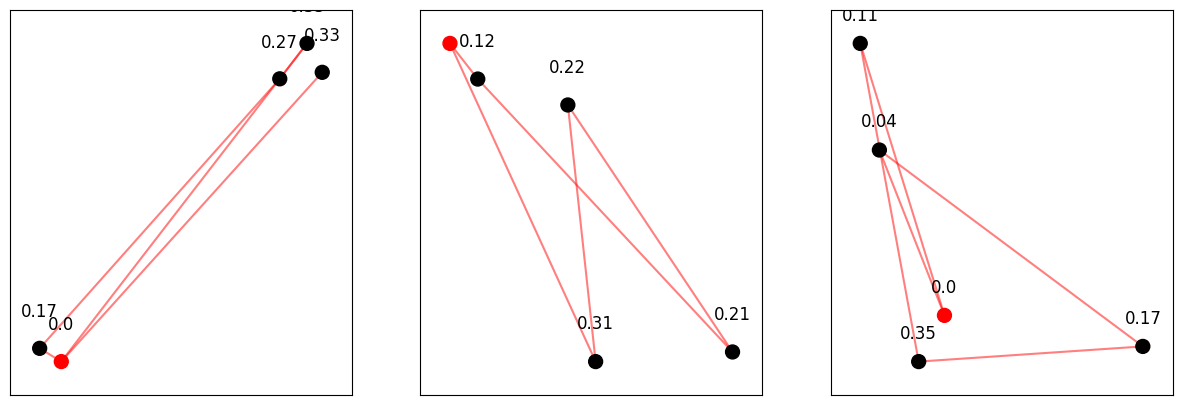

<Figure size 640x480 with 0 Axes>

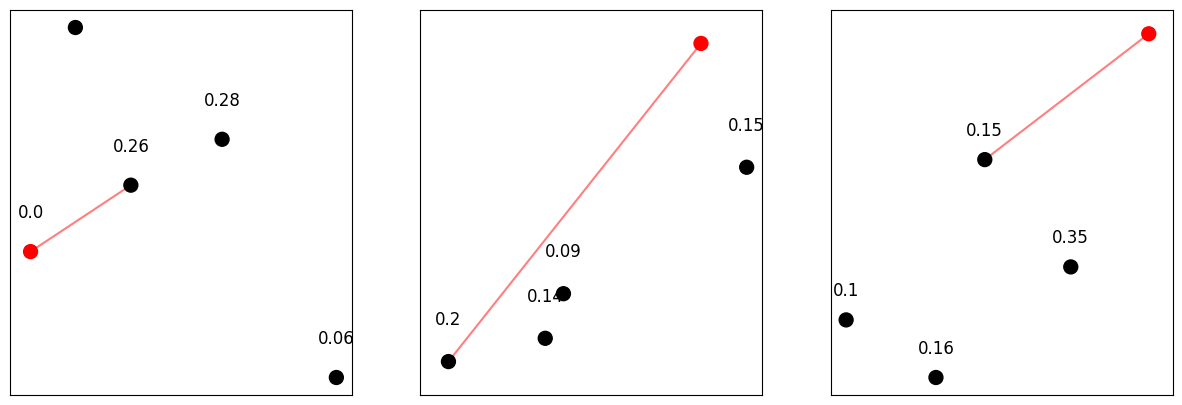

<Figure size 640x480 with 0 Axes>

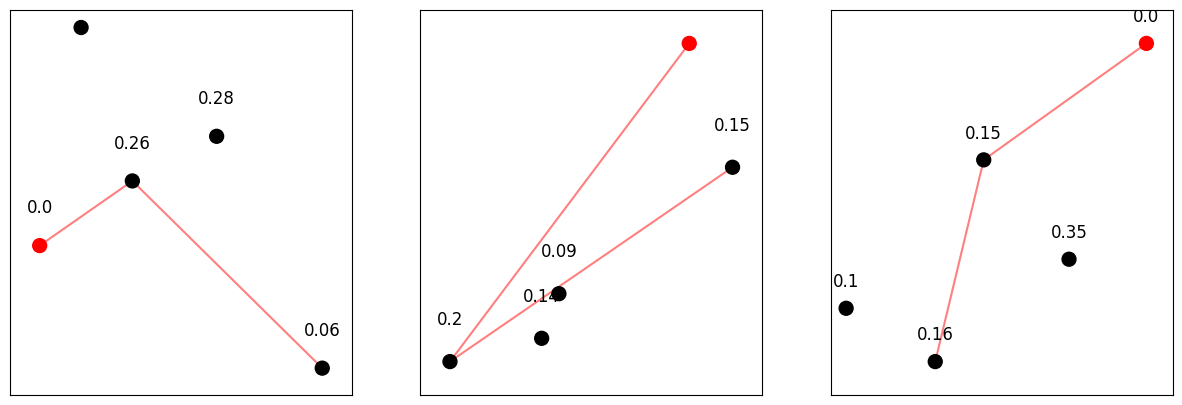

<Figure size 640x480 with 0 Axes>

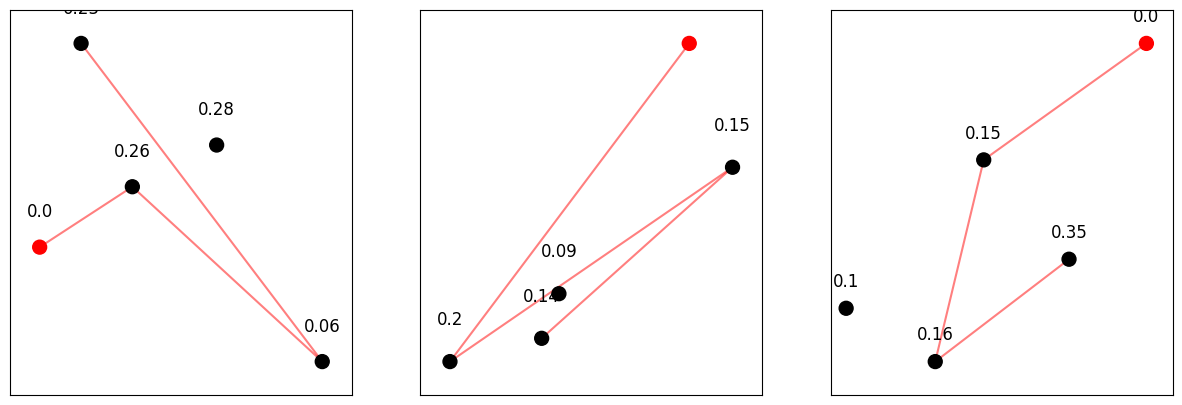

<Figure size 640x480 with 0 Axes>

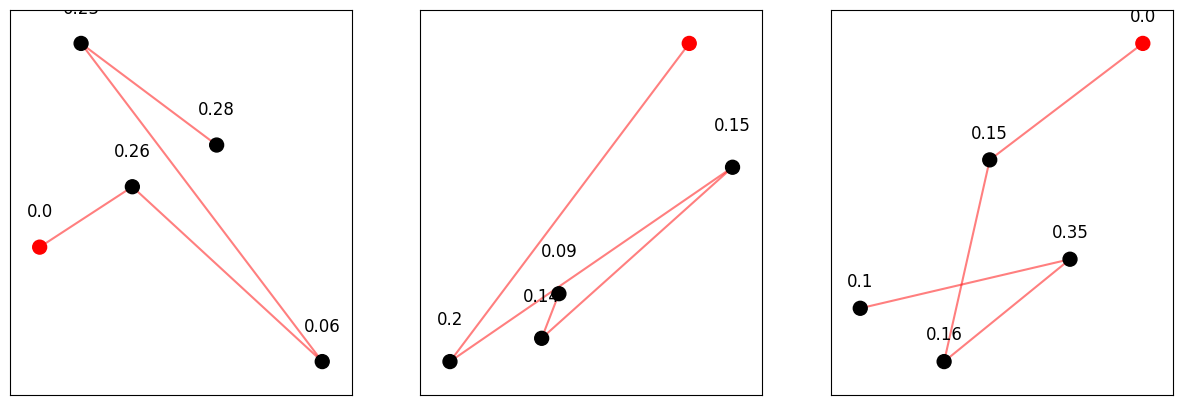

<Figure size 640x480 with 0 Axes>

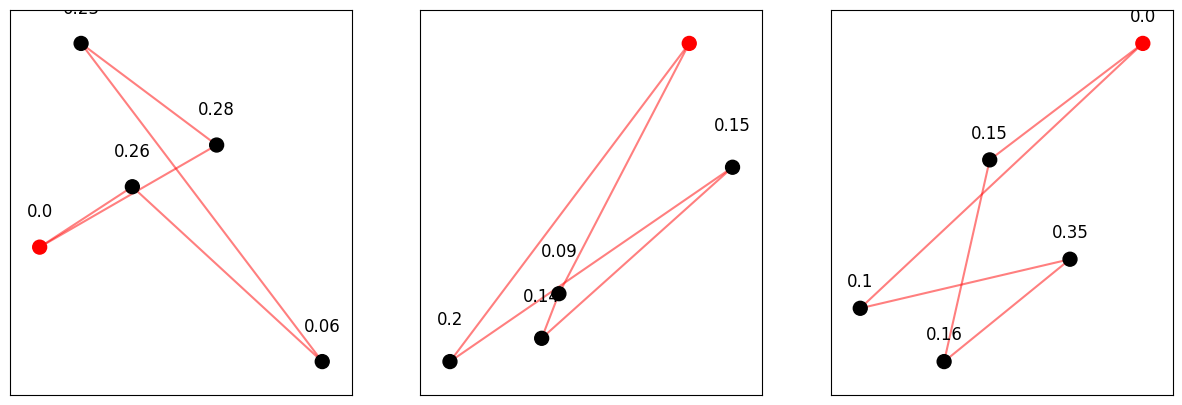

<Figure size 640x480 with 0 Axes>

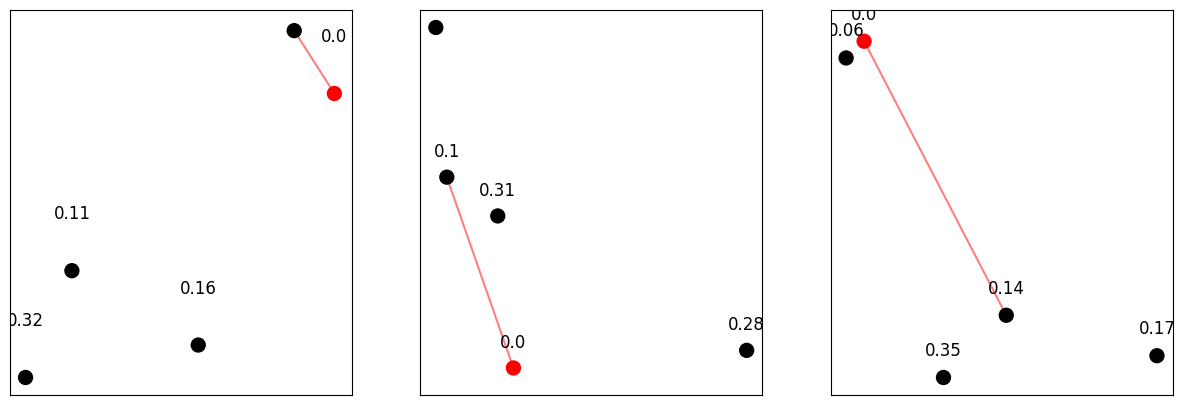

<Figure size 640x480 with 0 Axes>

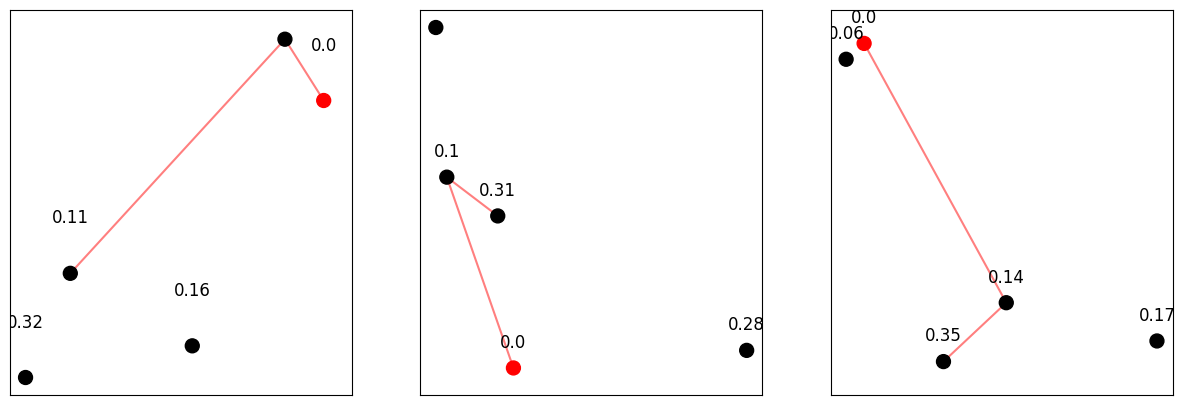

<Figure size 640x480 with 0 Axes>

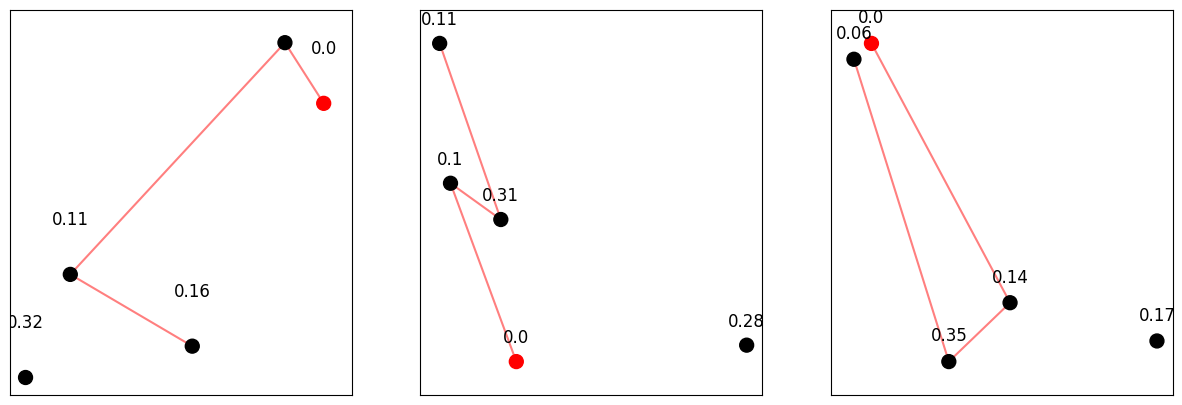

<Figure size 640x480 with 0 Axes>

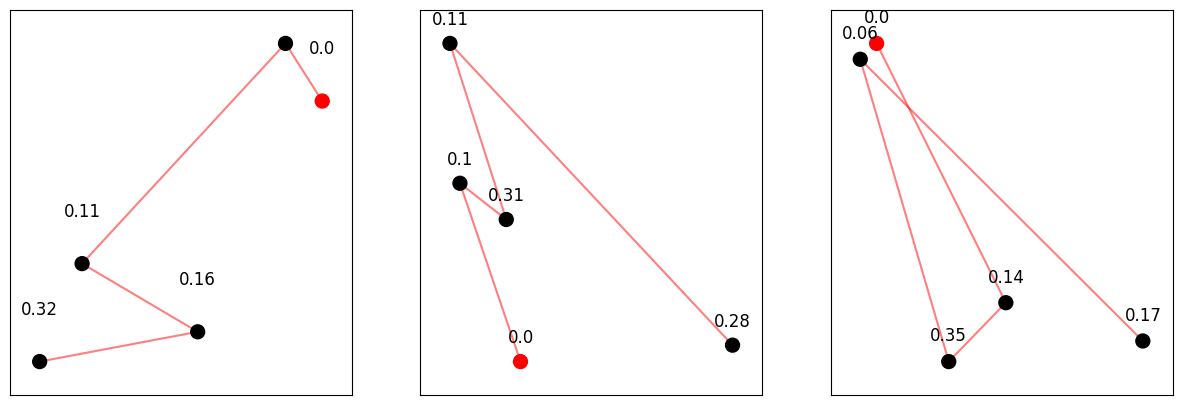

<Figure size 640x480 with 0 Axes>

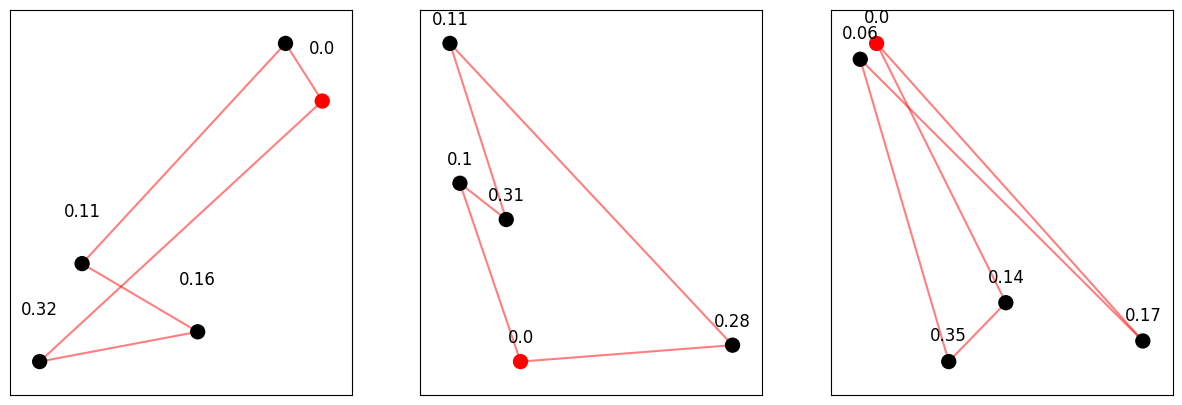

<Figure size 640x480 with 0 Axes>

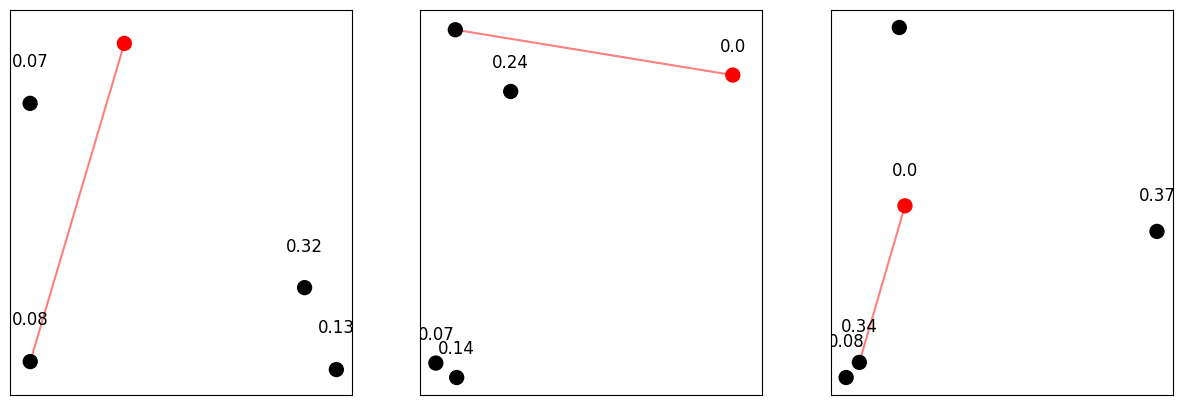

<Figure size 640x480 with 0 Axes>

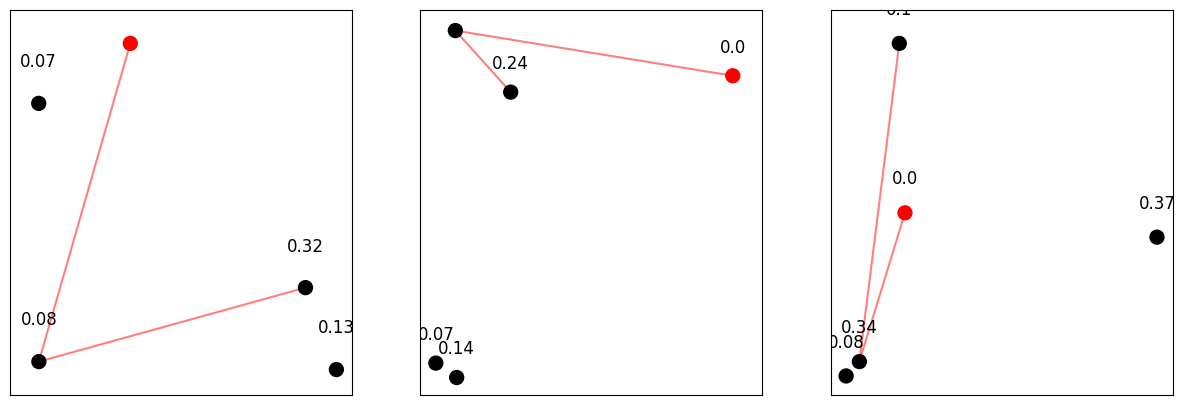

<Figure size 640x480 with 0 Axes>

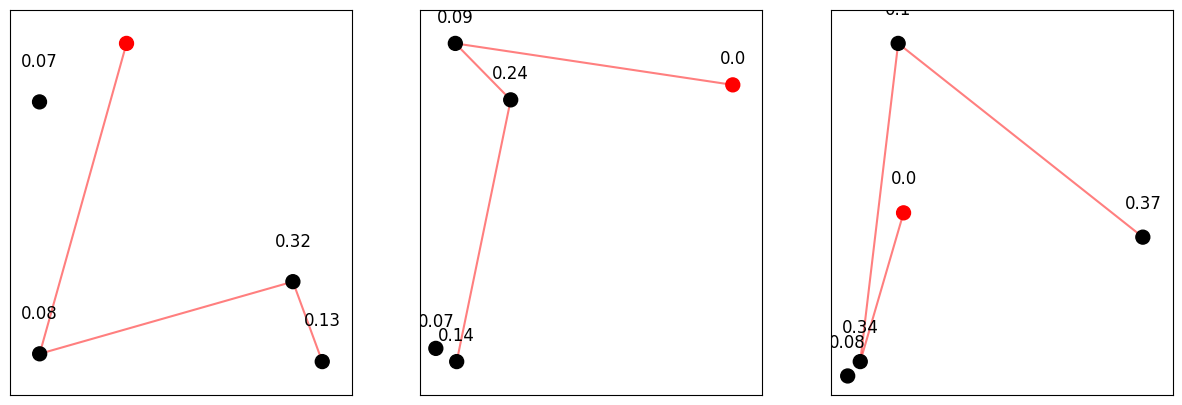

<Figure size 640x480 with 0 Axes>

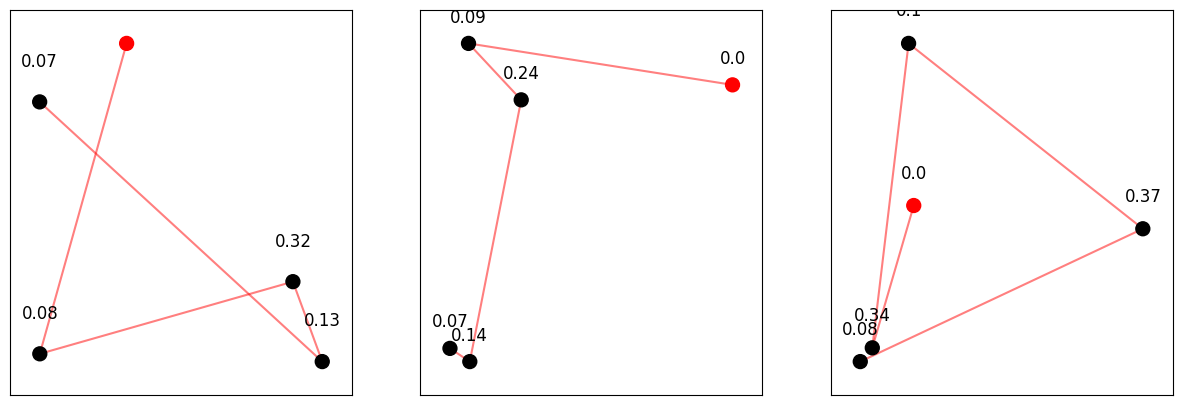

<Figure size 640x480 with 0 Axes>

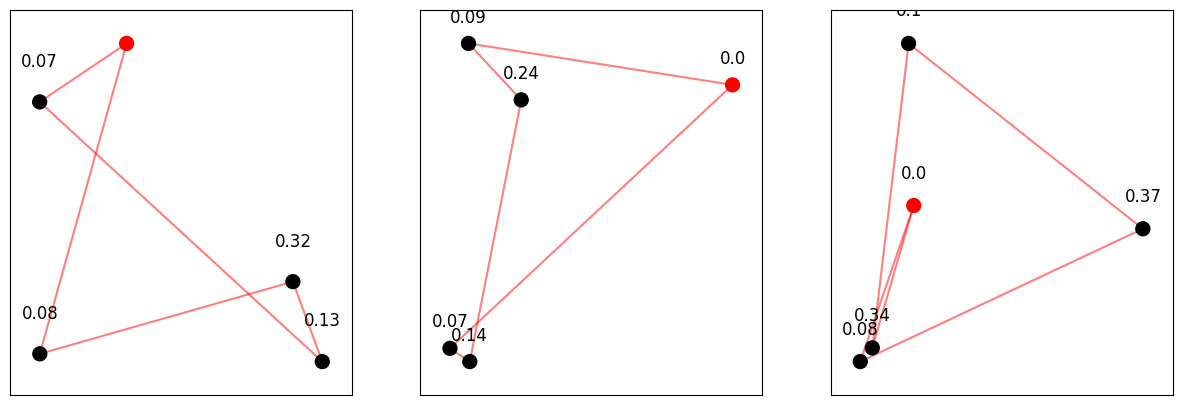

<Figure size 640x480 with 0 Axes>

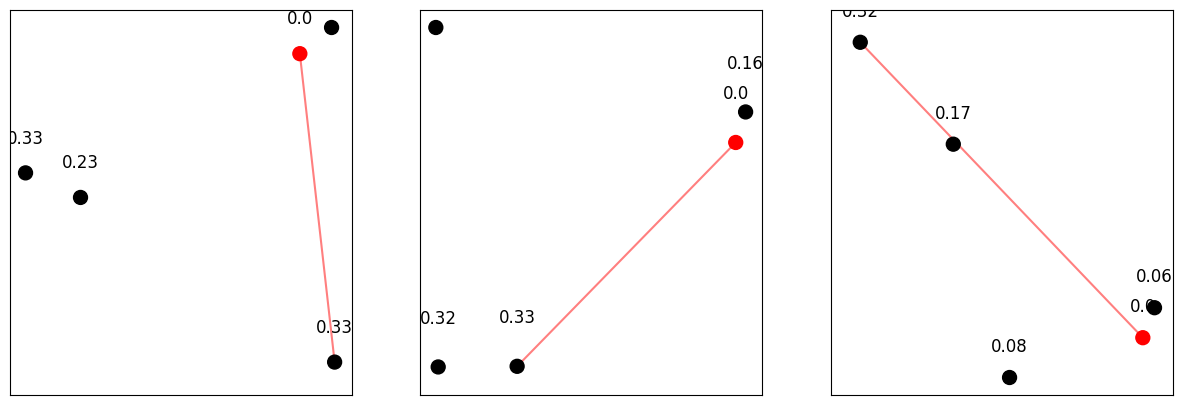

<Figure size 640x480 with 0 Axes>

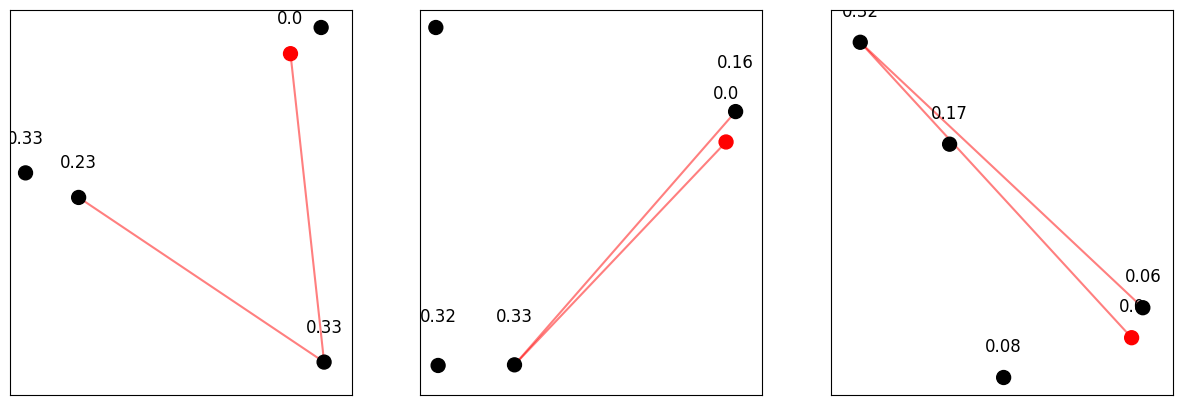

<Figure size 640x480 with 0 Axes>

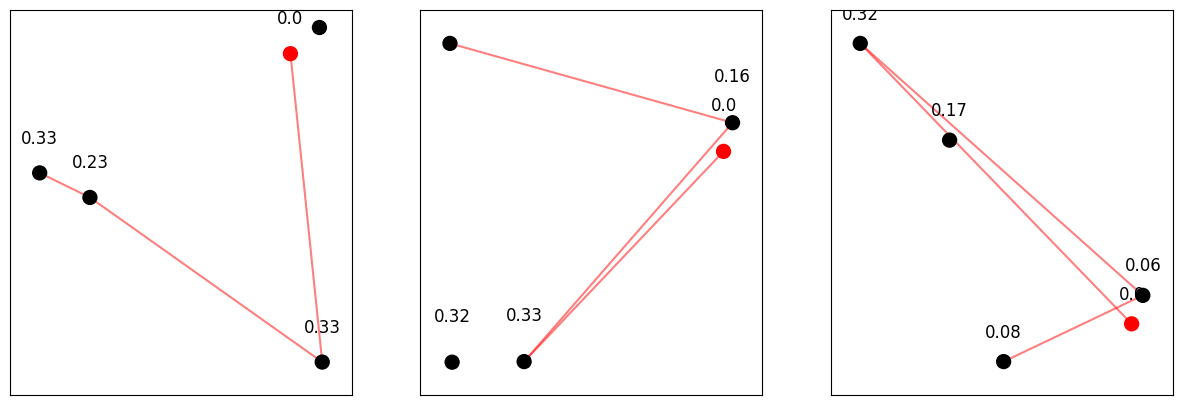

<Figure size 640x480 with 0 Axes>

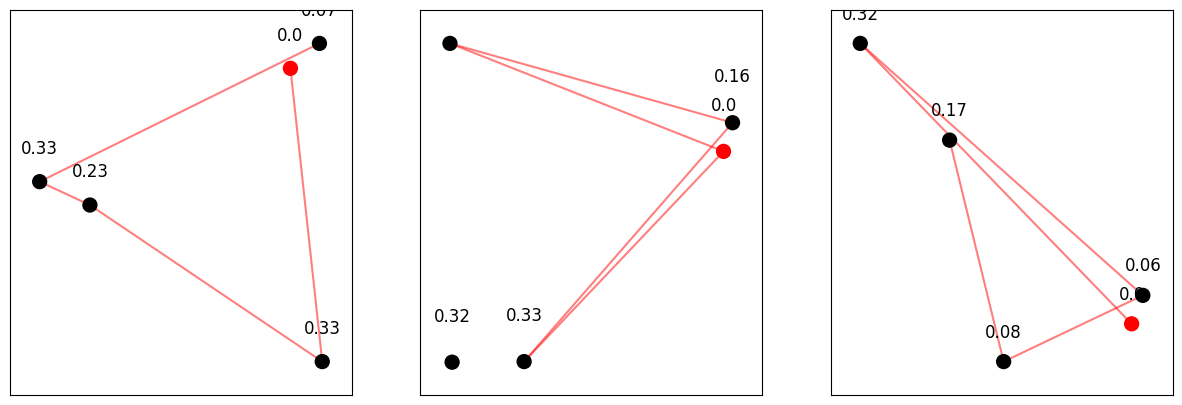

<Figure size 640x480 with 0 Axes>

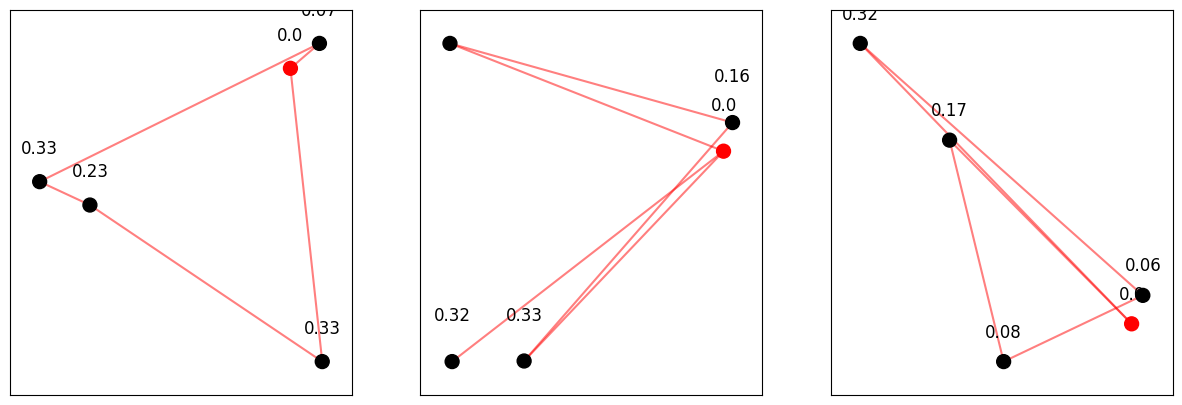

<Figure size 640x480 with 0 Axes>

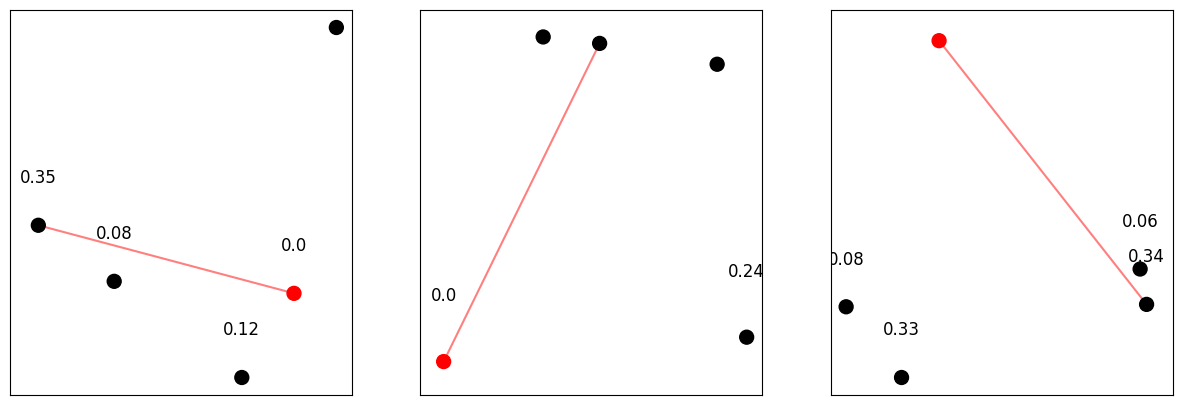

<Figure size 640x480 with 0 Axes>

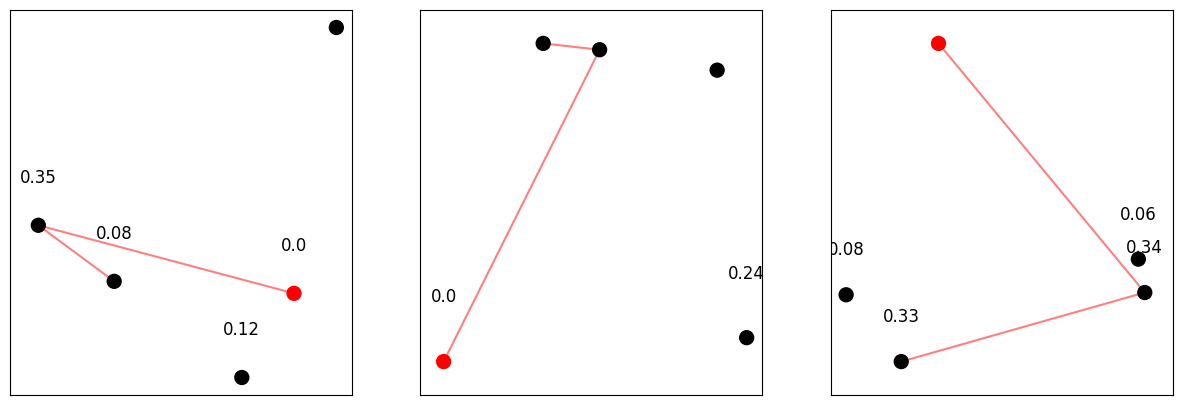

<Figure size 640x480 with 0 Axes>

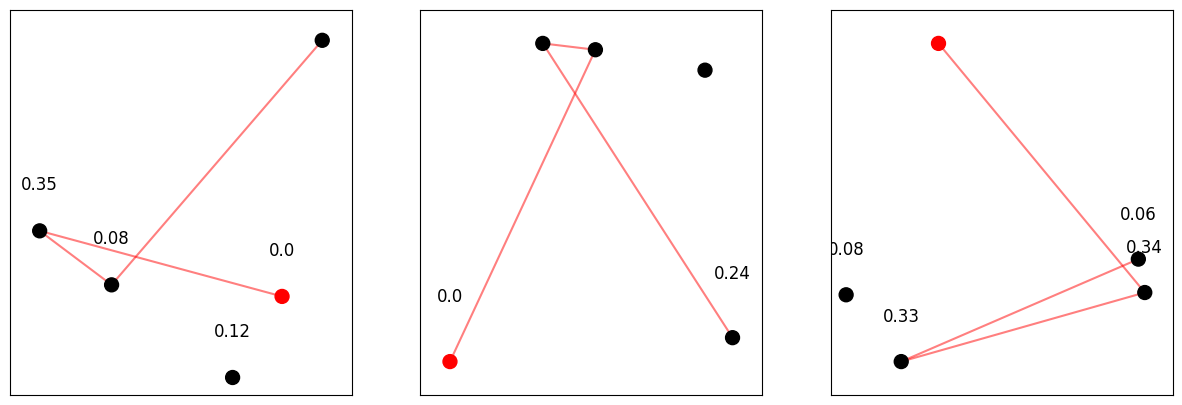

<Figure size 640x480 with 0 Axes>

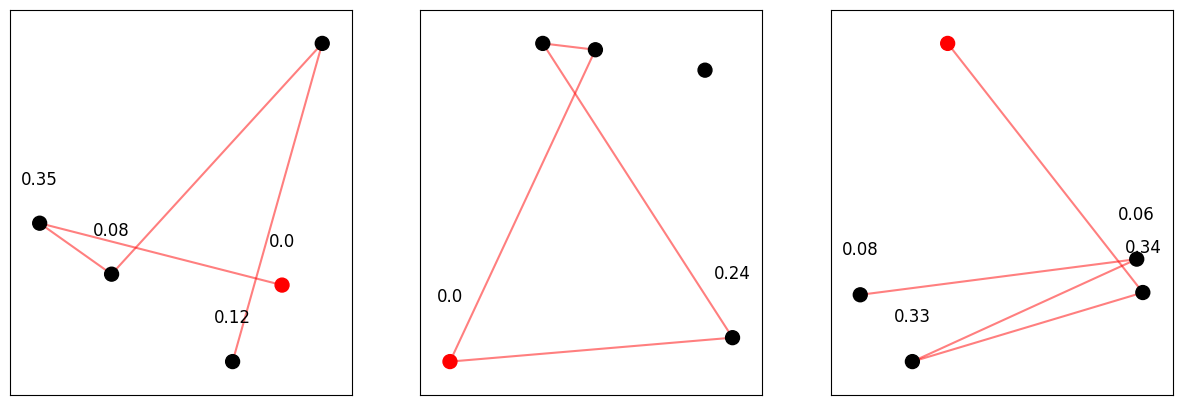

<Figure size 640x480 with 0 Axes>

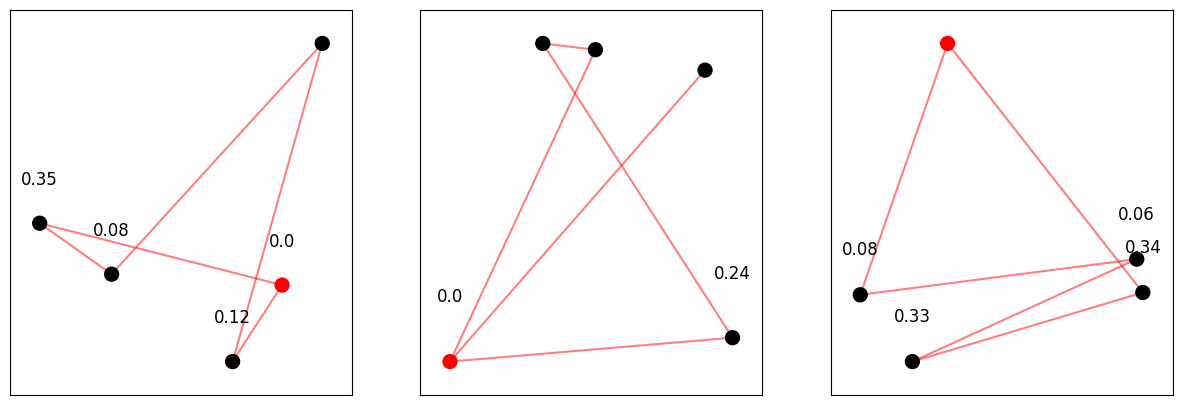

INFO:root:Average Reward: -2.644801902770996


In [ ]:
# Evaluate the agent
final_reward = agent.evaluate(env_santa)

In [ ]:
# Close the video recorder
env_santa.vid.close()

In closing function
Environment closing
Moviepy - Building video ./videos/video_test_santa_rnn_5_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_rnn_5_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_rnn_5_123.mp4


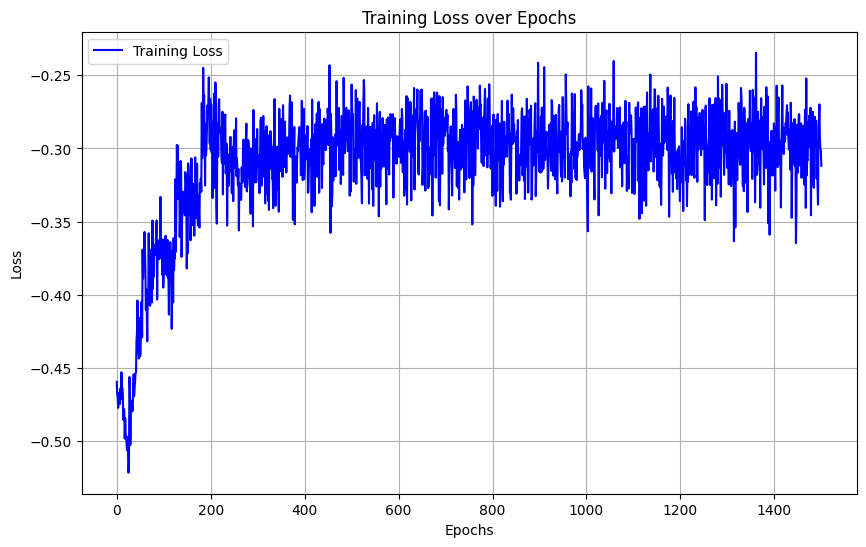

In [ ]:
# Load the CSV file
csv_path = f"./train_logs/loss_log_santa_rnn_{num_nodes}_{seed}.csv"
data = pd.read_csv(csv_path)

# Extract the 'Epoch' and 'Loss' columns
epochs = data['Epoch']
loss = data['Loss']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


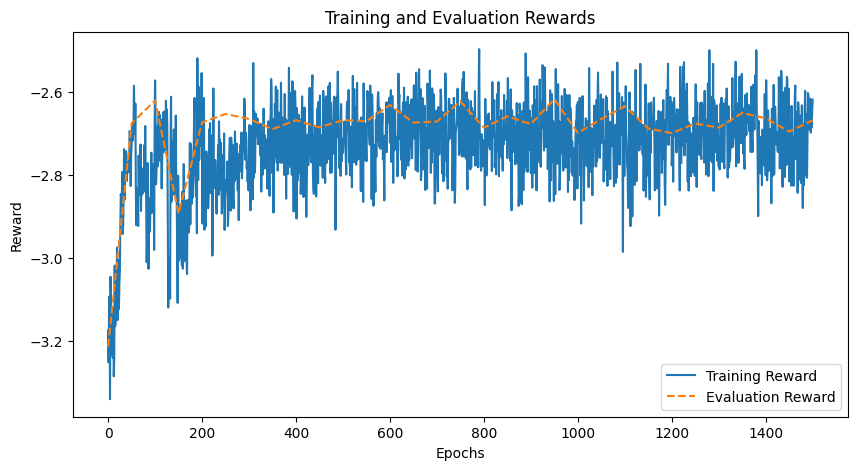

In [ ]:
training_rewards = data['Train Reward']
eval_rewards = data['Eval Reward'].dropna()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(training_rewards, label='Training Reward')
plt.plot(eval_rewards, label='Evaluation Reward', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Reward')
plt.title('Training and Evaluation Rewards')
plt.legend()
plt.show()